In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
pd.options.display.float_format = '{:.2f}'.format

df_float = pd.read_csv("cleaned_data.csv")

In [4]:
df_float.head(2)

,Gender,CGPA,10th Class Board,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class School Category,12th Class Board,12th Class Physics Marks (out of 100),...,12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
0,Female,8.60,ICSE,83,89,86,91.80,Private School,ICSE,98.00,...,90,96.00,94.90,87.80,57.40,84.50,91.90,86.10,82.60,88.30
1,Male,8.60,State Board,93,79,76,88.00,Government School,Others,82.00,...,78,81.40,95.30,58.30,95.70,88.20,89.90,72.60,90.60,84.70


In [7]:
newdf_float=df_float.copy()

In [8]:
# remove the string value
df1 = newdf_float.drop(["Gender", "10th Class Board", "12th Class School Category", "12th Class Board"], axis=1, errors='ignore')

In [9]:
# remove the string value
df_ivf = newdf_float.drop(["Gender", "10th Class Board", "12th Class School Category", "12th Class Board"], axis=1, errors='ignore')

In [95]:
# correlation with CGPA
correlation=df1.corr()
correlation_cgpa=correlation["CGPA"].sort_values(ascending=False)
correlation_cgpa

CGPA                                             1.00
12th Class Overall Percentage                    0.34
10th Class Overall Percentage                    0.31
12th Class Maths Marks (out of 100)              0.31
10th Class English/Language Marks (out of 100)   0.26
12th Class Physics Marks (out of 100)            0.25
10th Class Maths Marks (out of 100)              0.22
12th Class English/Language Marks (out of 100)   0.22
12th Class Chemistry Marks (out of 100)          0.20
JEE Mains Session 1 Maths Percentile             0.18
10th Class Science Marks (out of 100)            0.18
JEE Mains Session 2 Overall  Percentile          0.17
JEE Mains Session 2 Physics  Percentile          0.17
JEE Mains Session 2 Chemistry  Percentile        0.10
JEE Mains Session 2 Maths  Percentile            0.10
JEE Mains Session 1 Overall Score                0.09
JEE Mains Session 1 Physics  Percentile          0.06
JEE Mains Session 1 Chemistry  Percentile        0.04
Name: CGPA, dtype: float64

In [96]:
df1["Academic_Avg"] = (df1["12th Class Overall Percentage"] + df1["10th Class Overall Percentage"]) / 2
df1["Maths_Avg"] = (df1["12th Class Maths Marks (out of 100)"] + df1["10th Class Maths Marks (out of 100)"] + df1["JEE Mains Session 1 Maths Percentile"]) / 3
df1["Science_Avg"] = (df1["12th Class Physics Marks (out of 100)"] + df1["12th Class Chemistry Marks (out of 100)"] + df1["10th Class Science Marks (out of 100)"]) / 3
df1["English_Avg"] = (df1["12th Class English/Language Marks (out of 100)"] + df1["10th Class English/Language Marks (out of 100)"]) / 2
df1["JEE_Avg"] = (df1["JEE Mains Session 2 Overall  Percentile"] + df1["JEE Mains Session 2 Physics  Percentile"] + df1["JEE Mains Session 2 Chemistry  Percentile"] + df1["JEE Mains Session 2 Maths  Percentile"]) / 4

# Keep only the transformed features + CGPA
selected_features = ["Academic_Avg", "Maths_Avg", "Science_Avg", "English_Avg", "JEE_Avg", "CGPA"]
df1 = df1[selected_features]

# Check correlation again
correlation = df1.corr()
print(correlation["CGPA"].sort_values(ascending=False))

CGPA           1.00
Academic_Avg   0.40
Maths_Avg      0.34
English_Avg    0.28
Science_Avg    0.28
JEE_Avg        0.18
Name: CGPA, dtype: float64


# Regression on above calculated matrix

In [97]:
# Defining X (input features) and y (target variable)
selected_features = ["Academic_Avg", 
                     "Maths_Avg"
                     , "Science_Avg"
                     , "English_Avg", "JEE_Avg"
                     ]
X = df1[selected_features]
y = df1["CGPA"]

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print(feature_importance.sort_values(by="Coefficient", ascending=False))

Mean Squared Error (MSE): 0.729866232811648
R-squared Score (R²): 0.2607121792382141
        Feature  Coefficient
0  Academic_Avg         0.09
1     Maths_Avg         0.02
4       JEE_Avg         0.00
3   English_Avg        -0.00
2   Science_Avg        -0.03


In [14]:
# Defining X (input features) and y (target variable)
selected_features = ['10th Class Science Marks (out of 100)',
       '10th Class Maths Marks (out of 100)',
       '10th Class English/Language Marks (out of 100)',
       '10th Class Overall Percentage',
       '12th Class Physics Marks (out of 100)',
       '12th Class Maths Marks (out of 100)',
       '12th Class Chemistry Marks (out of 100)',
       '12th Class English/Language Marks (out of 100)',
       '12th Class Overall Percentage', 'JEE Mains Session 1 Maths Percentile',
       'JEE Mains Session 1 Physics  Percentile',
       'JEE Mains Session 1 Chemistry  Percentile',
       'JEE Mains Session 1 Overall Score',
       'JEE Mains Session 2 Maths  Percentile',
       'JEE Mains Session 2 Physics  Percentile',
       'JEE Mains Session 2 Chemistry  Percentile',
       'JEE Mains Session 2 Overall  Percentile']
X = df_ivf.drop(columns=["CGPA"])
y = df_ivf["CGPA"]

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)

feature_importance = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
# print(feature_importance.sort_values(by="Coefficient", ascending=False))


Mean Squared Error (MSE): 0.7690516227300654
R-squared Score (R²): 0.22102095882527628


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_ivf.drop(columns=['CGPA'])  # Features only
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                                           Feature     VIF
0            10th Class Science Marks (out of 100)  317.47
1              10th Class Maths Marks (out of 100)  390.80
2   10th Class English/Language Marks (out of 100)  331.79
3                    10th Class Overall Percentage 1975.92
4            12th Class Physics Marks (out of 100)  201.10
5              12th Class Maths Marks (out of 100)   99.99
6          12th Class Chemistry Marks (out of 100)  196.64
7   12th Class English/Language Marks (out of 100)  190.26
8                    12th Class Overall Percentage 1272.47
9             JEE Mains Session 1 Maths Percentile   19.55
10         JEE Mains Session 1 Physics  Percentile  196.65
11       JEE Mains Session 1 Chemistry  Percentile  117.66
12               JEE Mains Session 1 Overall Score  651.82
13           JEE Mains Session 2 Maths  Percentile   17.42
14         JEE Mains Session 2 Physics  Percentile  158.04
15       JEE Mains Session 2 Chemistry  Percentile   77.

outcomes <br>
#### Variance Inflation Factor (VIF) : we calculated above
<br>
which says If any feature has VIF > 10, it indicates strong multicollinearity, and you should consider dropping it.<br>
and we have all features greater than 10


In [99]:
# Selecting the best features based on correlation (>0.2)
selected_features = [
    "12th Class Overall Percentage",
    "10th Class Overall Percentage",
    "12th Class Maths Marks (out of 100)",
    "10th Class English/Language Marks (out of 100)",
    "12th Class Physics Marks (out of 100)",
    "10th Class Maths Marks (out of 100)",
    "12th Class English/Language Marks (out of 100)",
    "12th Class Chemistry Marks (out of 100)"
]
# Defining X (input features) and y (target variable)
X = newdf_float[selected_features]
y = newdf_float["CGPA"]

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)

feature_importance = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
# print(feature_importance.sort_values(by="Coefficient", ascending=False))


Mean Squared Error (MSE): 0.7937834732679251
R-squared Score (R²): 0.19596985347805995


In [100]:
reg_df = newdf_float.drop(["Gender", "10th Class Board", "12th Class School Category", "12th Class Board"], axis=1, errors='ignore')

selected_features = [
    "12th Class Overall Percentage",
    "10th Class Overall Percentage",
    "12th Class Maths Marks (out of 100)",
    "10th Class English/Language Marks (out of 100)",
    "12th Class Physics Marks (out of 100)",
    "10th Class Maths Marks (out of 100)",
    "12th Class English/Language Marks (out of 100)",
    "12th Class Chemistry Marks (out of 100)",
    "JEE Mains Session 1 Maths Percentile",  
    "10th Class Science Marks (out of 100)",     
    "JEE Mains Session 2 Overall  Percentile",          
    "JEE Mains Session 2 Physics  Percentile",          
    "JEE Mains Session 2 Chemistry  Percentile",      
    "JEE Mains Session 2 Maths  Percentile",            
    "JEE Mains Session 1 Overall Score",                 
    "JEE Mains Session 1 Physics  Percentile",           
    "JEE Mains Session 1 Chemistry  Percentile",
]

# Define Features (X) and Target (y)
X = reg_df.drop(columns=["CGPA"])  # All columns except CGPA
y = reg_df["CGPA"]  # Target variable

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate Model
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting R²: {r2_gb:.4f}")
print(f"Gradient Boosting RMSE: {rmse_gb:.4f}")


Gradient Boosting R²: -0.0183
Gradient Boosting RMSE: 1.0026


In [101]:
selected_features = [
    "10th Class Overall Percentage",
    "12th Class Overall Percentage",
    # "JEE Mains Session 1 Overall Score",
    # "JEE Mains Session 2 Physics  Percentile",
    # "JEE Mains Session 2 Chemistry  Percentile",
    "12th Class Maths Marks (out of 100)",
    "JEE Mains Session 1 Maths Percentile",
    "10th Class Maths Marks (out of 100)",
    # "JEE Mains Session 2 Maths  Percentile",
]
# Defining X (input features) and y (target variable)
X = reg_df[selected_features]
y = reg_df["CGPA"]

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print(feature_importance.sort_values(by="Coefficient", ascending=False))


Mean Squared Error (MSE): 0.7425711275973532
R-squared Score (R²): 0.24784328140888312
                                Feature  Coefficient
0         10th Class Overall Percentage         0.03
1         12th Class Overall Percentage         0.03
3  JEE Mains Session 1 Maths Percentile         0.01
4   10th Class Maths Marks (out of 100)         0.01
2   12th Class Maths Marks (out of 100)         0.00


In [102]:
correlation = reg_df.corr()
print(correlation["CGPA"].sort_values(ascending=False))

CGPA                                             1.00
12th Class Overall Percentage                    0.34
10th Class Overall Percentage                    0.31
12th Class Maths Marks (out of 100)              0.31
10th Class English/Language Marks (out of 100)   0.26
12th Class Physics Marks (out of 100)            0.25
10th Class Maths Marks (out of 100)              0.22
12th Class English/Language Marks (out of 100)   0.22
12th Class Chemistry Marks (out of 100)          0.20
JEE Mains Session 1 Maths Percentile             0.18
10th Class Science Marks (out of 100)            0.18
JEE Mains Session 2 Overall  Percentile          0.17
JEE Mains Session 2 Physics  Percentile          0.17
JEE Mains Session 2 Chemistry  Percentile        0.10
JEE Mains Session 2 Maths  Percentile            0.10
JEE Mains Session 1 Overall Score                0.09
JEE Mains Session 1 Physics  Percentile          0.06
JEE Mains Session 1 Chemistry  Percentile        0.04
Name: CGPA, dtype: float64


In [103]:
from sklearn.preprocessing import StandardScaler

# Creating New Columns
reg_df["12th_Class_Total"] = reg_df["12th Class Maths Marks (out of 100)"] + reg_df["12th Class Physics Marks (out of 100)"] + reg_df["12th Class Chemistry Marks (out of 100)"]
reg_df["10th_Class_Total"] = reg_df["10th Class Maths Marks (out of 100)"] + reg_df["10th Class Science Marks (out of 100)"] + reg_df["10th Class English/Language Marks (out of 100)"]
reg_df["Overall_Performance"] = (reg_df["10th Class Overall Percentage"] + reg_df["12th Class Overall Percentage"]) / 2
reg_df["JEE_Mains_Total"] = reg_df["JEE Mains Session 1 Overall Score"] + reg_df["JEE Mains Session 2 Overall  Percentile"]
reg_df["JEE_×_12th"] = reg_df["JEE Mains Session 1 Overall Score"] * reg_df["12th Class Overall Percentage"]
reg_df["10th_×_12th"] = reg_df["10th Class Overall Percentage"] * reg_df["12th Class Overall Percentage"]
reg_df["Maths_×_Physics"] = reg_df["12th Class Maths Marks (out of 100)"] * reg_df["12th Class Physics Marks (out of 100)"]

# **Updated feature selection**
selected_features = [
    "12th Class Overall Percentage",
    "10th Class Overall Percentage",
    "12th Class Maths Marks (out of 100)",
    "12th_Class_Total",
    "Overall_Performance",
    "Maths_×_Physics",
    "10th_×_12th"
    # ,
    # "JEE_×_12th",
    # "10th_Class_Total",
    # "JEE_Mains_Total"
]

# Define X and y
X = reg_df[selected_features]
y = reg_df["CGPA"]

# **Normalize Data**
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Apply Linear Regression**
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Updated Mean Squared Error (MSE):", mse)
print("Updated R-squared Score (R²):", r2)

# **Display Feature Coefficients**
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:")
print(coefficients)

Updated Mean Squared Error (MSE): 0.7808708261910601
Updated R-squared Score (R²): 0.2090491854002221

Feature Coefficients:
                               Feature         Coefficient
0        12th Class Overall Percentage   88933425494489.67
1        10th Class Overall Percentage   56438225775011.70
5                      Maths_×_Physics                0.31
2  12th Class Maths Marks (out of 100)                0.00
3                     12th_Class_Total               -0.38
6                          10th_×_12th               -1.33
4                  Overall_Performance -121510370304098.11


# Squaring features

In [104]:
# remove the string value
float_df = newdf_float.drop(["Gender", "10th Class Board", "12th Class School Category", "12th Class Board"], axis=1, errors='ignore')

In [105]:
float_df.head(5)

,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
0,8.60,83,89,86,91.80,98.00,98.00,93.00,90,96.00,94.90,87.80,57.40,84.50,91.90,86.10,82.60,88.30
1,8.60,93,79,76,88.00,82.00,81.00,78.00,78,81.40,95.30,58.30,95.70,88.20,89.90,72.60,90.60,84.70
2,8.60,95,99,84,94.40,75.00,86.00,72.00,80,79.00,73.30,87.80,78.30,84.80,82.90,93.60,83.20,90.40
3,8.60,98,99,99,97.16,94.00,95.00,96.00,91,95.00,71.70,93.90,88.90,92.60,78.10,93.80,86.00,90.60
4,8.40,80,95,91,91.00,95.00,92.00,83.00,92,90.20,96.30,91.80,72.70,90.10,91.50,86.50,88.60,89.90


In [106]:
reg_df.head(3)

,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),12th Class Overall Percentage,...,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile,12th_Class_Total,10th_Class_Total,Overall_Performance,JEE_Mains_Total,JEE_×_12th,10th_×_12th,Maths_×_Physics
0,8.60,83,89,86,91.80,98.00,98.00,93.00,90,96.00,...,86.10,82.60,88.30,289.00,258,93.90,172.80,8112.00,8812.80,9604.00
1,8.60,93,79,76,88.00,82.00,81.00,78.00,78,81.40,...,72.60,90.60,84.70,241.00,248,84.70,172.90,7179.48,7163.20,6642.00
2,8.60,95,99,84,94.40,75.00,86.00,72.00,80,79.00,...,93.60,83.20,90.40,233.00,278,86.70,175.20,6699.20,7457.60,6450.00


In [116]:
reg_df_sq = reg_df[[ "12th Class Overall Percentage",
    "10th Class Overall Percentage",
    "12th Class Maths Marks (out of 100)",
    "12th_Class_Total",
    "Overall_Performance",
    "Maths_×_Physics",
    "10th_×_12th","CGPA"]]

In [113]:
reg_df.head(2)

,CGPA,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),12th Class Chemistry Marks (out of 100),12th Class English/Language Marks (out of 100),12th Class Overall Percentage,...,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile,12th_Class_Total,10th_Class_Total,Overall_Performance,JEE_Mains_Total,JEE_×_12th,10th_×_12th,Maths_×_Physics
0,8.60,83,89,86,91.80,98.00,98.00,93.00,90,96.00,...,86.10,82.60,88.30,289.00,258,93.90,172.80,8112.00,8812.80,9604.00
1,8.60,93,79,76,88.00,82.00,81.00,78.00,78,81.40,...,72.60,90.60,84.70,241.00,248,84.70,172.90,7179.48,7163.20,6642.00


In [117]:
reg_df_sq = reg_df_sq**2  # Squaring all values in the DataFrame

reg_df_sq.head(2)  # Displaying the first two rows


,12th Class Overall Percentage,10th Class Overall Percentage,12th Class Maths Marks (out of 100),12th_Class_Total,Overall_Performance,Maths_×_Physics,10th_×_12th,CGPA
0,9216.00,8427.24,9604.00,83521.00,8817.21,92236816.00,77665443.84,73.96
1,6625.96,7744.00,6561.00,58081.00,7174.09,44116164.00,51311434.24,73.96


In [118]:
X = reg_df_sq.drop(columns= ["CGPA"])
y = reg_df_sq["CGPA"]

# **Normalize Data**
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Apply Linear Regression**
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Updated Mean Squared Error (MSE):", mse)
print("Updated R-squared Score (R²):", r2)

# **Display Feature Coefficients**
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

print("\nFeature Coefficients:")
print(coefficients)

Updated Mean Squared Error (MSE): 117.21281060868644
Updated R-squared Score (R²): 0.22845768685117895

Feature Coefficients:
                               Feature  Coefficient
4                  Overall_Performance        36.29
5                      Maths_×_Physics         2.85
2  12th Class Maths Marks (out of 100)         1.21
3                     12th_Class_Total        -5.49
1        10th Class Overall Percentage        -8.45
0        12th Class Overall Percentage        -9.57
6                          10th_×_12th       -14.71


In [2]:
# Polynomial Regression
import pandas as pd

In [3]:
df=pd.read_csv("cleaned_data.csv")

In [6]:
new_df=df.copy()

In [9]:
new_df = df.select_dtypes(exclude=['object'])


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CGPA                                            158 non-null    float64
 1   10th Class Science Marks (out of 100)           158 non-null    int64  
 2   10th Class Maths Marks (out of 100)             158 non-null    int64  
 3   10th Class English/Language Marks (out of 100)  158 non-null    int64  
 4   10th Class Overall Percentage                   158 non-null    float64
 5   12th Class Physics Marks (out of 100)           158 non-null    float64
 6   12th Class Maths Marks (out of 100)             158 non-null    float64
 7   12th Class Chemistry Marks (out of 100)         158 non-null    float64
 8   12th Class English/Language Marks (out of 100)  158 non-null    int64  
 9   12th Class Overall Percentage              

Mean Squared Error: 16.8643
R-Squared Score: -16.0820


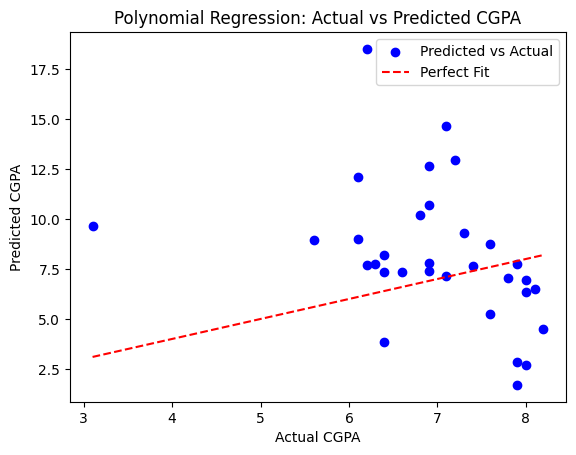

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = new_df.drop(columns=['CGPA'])  # Remove CGPA from features
y = new_df['CGPA']                 # Target variable

# Split into Training and Testing Data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Transformation (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Linear Regression on Polynomial Features
model = LinearRegression()
model.fit(X_train_poly, y_train)

#  Make Predictions
y_pred = model.predict(X_test_poly)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared Score: {r2:.4f}")

# Scatter Plot of Actual vs Predicted CGPA
plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")
plt.title("Polynomial Regression: Actual vs Predicted CGPA")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Fit")
plt.legend()
plt.show()
